# Wine Quality Prediction v2

## Info

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: [Web Link] or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

## **Problem Statement**

Perform `Regression` analysis to estimate Wine Quality

## Data Dictionary

Input variables (based on physicochemical tests):

* 1 - fixed acidity

* 2 - volatile acidity

* 3 - citric acid

* 4 - residual sugar

* 5 - chlorides

* 6 - free sulfur dioxide

* 7 - total sulfur dioxide

* 8 - density

* 9 - pH

* 10 - sulphates

* 11 - alcohol

Target variable (based on sensory data):

* 12 - quality (score between 0 and 10)

## Tools

* Pandas
* NumPy
* Matplotlib
* Seaborn
* Scikit-Learn

# Approach

* Data Analysis
* Data Cleaning
* Experimentation
* Conclusion


### Import all the necessary tools

In [23]:
# Importing tools
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Regular EDA (Exploratory Data Analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

# Data Standardization
from sklearn.preprocessing import StandardScaler

In [2]:
# Function for computing cross-validated evaluation metrics
def cross_validation_report(model, X_train, y_train, k):
    '''
    This function computes the cross-validated
    R2 score, MAE and MSE for a regression model accross k folds.
    '''
    
    cross_r2 = cross_val_score(model, X_train, y_train, cv=k, scoring="r2")
    cross_mae = cross_val_score(model, X_train, y_train, cv=k, scoring="neg_mean_absolute_error")
    cross_mse = cross_val_score(model, X_train, y_train, cv=k, scoring="neg_mean_squared_error")
    cross_rmse = cross_val_score(model, X_train, y_train, cv=k, scoring="neg_root_mean_squared_error")
    
    metrics = {"R2": cross_r2.mean(),
               "Mean Absolute Error": (cross_mae.mean())*-1,
               "Mean Squared Error": (cross_mse.mean())*-1,
               "Root Mean Squared Error": (cross_rmse.mean())*-1}
    return metrics


def test_eval(y_test, y_preds):
    '''
    This function evaluates the predictions made by
    a Regression model on the test set.
    '''
    r2 = r2_score(y_test, y_preds)
    mae = mean_absolute_error(y_test, y_preds)
    mse = mean_squared_error(y_test, y_preds)
    rmse = np.sqrt(mean_squared_error(y_test, y_preds))
    
    return {"R2": r2, "MAE": mae, "MSE": mse, "RMSE": rmse}

def plot_confusion_matrix(y_test, y_preds, colormap):
    '''
    This function plots a Confusion Matrix using
    Seaborn's heatmap.
    '''
    sns.set(font_scale=1.2)
    log_reg_conf = confusion_matrix(y_test, y_preds)
    sns.heatmap(log_reg_conf, annot=True, fmt='d', linewidths=.5,  
                cmap="Reds", cbar=False)
    plt.ylabel('true label')
    plt.xlabel('predicted label');
    

def plot_corr_matrix(data, color):
    '''
    This function plots a correlation matrix for an input
    DataFrame with Seaborn's heatmap
    '''
    plt.figure(figsize=(12,12))
    sns.set(font_scale=1.2)
    sns.heatmap(data.corr(),cmap=color, annot=True)


In [3]:
data = pd.read_csv("../data/winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Splitting and Standardizing the data

In [11]:
X = data.drop("quality", axis=1)
y = data["quality"].values.astype(np.float)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print('X train size: ', X_train.shape)
print('y train size: ', y_train.shape)
print('X test size: ', X_test.shape)
print('y test size: ', y_test.shape)

X train size:  (1199, 11)
y train size:  (1199,)
X test size:  (400, 11)
y test size:  (400,)


### `Standardizing` the features around the center and mean of `0` with a standard deviation of `1` is important when we compare measurements that have different units. Variables that are measured at different scales do not contribute equally to the analysis and might end up creating a bias.

In [13]:
# Standardize the data

scaler = StandardScaler()
X_train_stan = scaler.fit_transform(X_train)
X_test_stan = scaler.transform(X_test)

## Experimenting with `Ensemble Models`

1. BaggingRegressor
2. RandomForestRegressor
3. ExtraTreesRegressor

## `Bagging Regression` with an ensemble of Linear Regressors

In [18]:
BagReg = BaggingRegressor(base_estimator=LinearRegression(),
                          n_estimators=500,
                          bootstrap_features = True,
                          max_features = 1.0, # Use all features
                          oob_score = True,
                          random_state = 0)

BagReg.fit(X_train_stan, y_train)

print("oob score: ", BagReg.oob_score_) # The oob score for BagReg is the R2 Score

oob score:  0.33947110663978963


In [20]:
y_preds = BagReg.predict(X_test_stan)
results = test_eval(y_test, y_preds)
results

{'R2': 0.3295479638920208,
 'MAE': 0.49737370246677287,
 'MSE': 0.4097760941439712,
 'RMSE': 0.6401375587668413}

### Bagging Regression with an ensemble of SVRs

In [21]:
BagReg = BaggingRegressor(base_estimator=SVR(),
                          n_estimators=500,
                          bootstrap_features = True,
                          max_features = 1.0, # Use all features
                          oob_score = True,
                          random_state = 0)

BagReg.fit(X_train_stan, y_train)

print("oob score: ", BagReg.oob_score_) # The oob score for BagReg is the R2 Score

oob score:  0.4077337828230264


In [22]:
y_preds = BagReg.predict(X_test_stan)
results = test_eval(y_test, y_preds)
results

{'R2': 0.3857153080639574,
 'MAE': 0.4619557970352365,
 'MSE': 0.37544696443198466,
 'RMSE': 0.6127372719461291}

### Bagging Regression with an ensemble of Ridge Regressors

In [24]:
BagReg = BaggingRegressor(base_estimator=Ridge(),
                          n_estimators=500,
                          bootstrap_features = True,
                          max_features = 1.0, # Use all features
                          oob_score = True,
                          random_state = 0)

BagReg.fit(X_train_stan, y_train)

print("oob score: ", BagReg.oob_score_) # The oob score for BagReg is the R2 Score

oob score:  0.33942059660599144


In [25]:
y_preds = BagReg.predict(X_test_stan)
results = test_eval(y_test, y_preds)
results

{'R2': 0.32948314879797747,
 'MAE': 0.49740938450077576,
 'MSE': 0.4098157087243562,
 'RMSE': 0.6401685002593897}

# Random Forest Regression 

In [28]:
rf_grid = {'n_estimators': [100,250,500],
           'max_features': [0.5,0.6,0.7,0.8,0.9,1.0],
           'max_depth': [16,20,24],
           'min_samples_leaf':[1,10,100],
           'random_state':[0],
           'n_jobs': [-1]}

# Use GridSearchCV to find best hyperparameters

rf_search = GridSearchCV(RandomForestRegressor(),
                         param_grid=rf_grid,
                         cv=5,
                         scoring='r2',
                         verbose=2,
                         n_jobs=-1)

rf_search.fit(X_train_stan, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 353 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done 636 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  1.4min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [16, 20, 24],
                         'max_features': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                         'min_samples_leaf': [1, 10, 100],
                         'n_estimators': [100, 250, 500], 'n_jobs': [-1],
                         'random_state': [0]},
             scoring='r2', verbose=2)

In [30]:
print('The best model hyperparameters: ', rf_search.best_params_)
print('This model produces a mean cross-validated score (r2) of', rf_search.best_score_)

The best model hyperparameters:  {'max_depth': 20, 'max_features': 0.5, 'min_samples_leaf': 1, 'n_estimators': 250, 'n_jobs': -1, 'random_state': 0}
This model produces a mean cross-validated score (r2) of 0.47733473695408846


### Evaluate on test set

In [31]:
y_preds = rf_search.predict(X_test_stan)
results = test_eval(y_test, y_preds)
results

{'R2': 0.4431321538633003,
 'MAE': 0.42472667050984453,
 'MSE': 0.34035414713471257,
 'RMSE': 0.5833987891097414}

# ExtraTrees Regression

In [32]:
extra_grid = {"n_estimators": [100,250,500],
              'max_features': [0.5,0.6,0.7,0.8,0.9,1.0],
              'max_depth': [16,20,24,28],
              'min_samples_leaf':[1,10,100],
              'random_state':[0],
              'n_jobs':[-1]}

# Use GridSearchCV to find best hyperparameters
extra_search = GridSearchCV(ExtraTreesRegressor(),
                            param_grid=extra_grid,
                            cv=5,
                            scoring='r2',
                            verbose=2,
                            n_jobs=-1)

extra_search.fit(X_train_stan, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 353 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 636 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done 1001 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  1.1min finished


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'max_depth': [16, 20, 24, 28],
                         'max_features': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                         'min_samples_leaf': [1, 10, 100],
                         'n_estimators': [100, 250, 500], 'n_jobs': [-1],
                         'random_state': [0]},
             scoring='r2', verbose=2)

In [34]:
print('The best model hyperparameters: ', extra_search.best_params_)
print('This model produces a mean cross-validated score (r2) of', extra_search.best_score_)

The best model hyperparameters:  {'max_depth': 24, 'max_features': 0.6, 'min_samples_leaf': 1, 'n_estimators': 500, 'n_jobs': -1, 'random_state': 0}
This model produces a mean cross-validated score (r2) of 0.4854877792467425


## Evaluate on test set

In [35]:
y_preds = extra_search.predict(X_test_stan)
results = test_eval(y_test, y_preds)
results

{'R2': 0.45933807343089217,
 'MAE': 0.39043670397701563,
 'MSE': 0.33044919038199766,
 'RMSE': 0.5748471017427136}

# Lets try a Bagging Regressor with our best `RandomForestRegressor` model

In [36]:
# Instantiate a Random Forest model with tuned hyperparameters

best_rf = RandomForestRegressor(n_estimators=250, max_depth=20, max_features=0.5, min_samples_leaf=1,
                                n_jobs=-1, random_state=0)

BagReg = BaggingRegressor(base_estimator=best_rf,
                          n_estimators=500,
                          bootstrap_features = True,
                          max_features = 1.0, # Use all features
                          oob_score = True,
                          random_state = 0)

BagReg.fit(X_train_stan, y_train)

print("oob score: ", BagReg.oob_score_) # The oob score for BagReg is the R2 Score

oob score:  0.47486536680231517


In [37]:
y_preds = BagReg.predict(X_test_stan)
results = test_eval(y_test, y_preds)
results

{'R2': 0.42338766854601695,
 'MAE': 0.4524256235225158,
 'MSE': 0.3524218531576029,
 'RMSE': 0.5936512891905508}

### This is the best result produced by the Bagging Regressor in this experiment

# Compiling the results

In [38]:
# Random Forest
y_preds = rf_search.predict(X_test_stan)
rf_results = test_eval(y_test, y_preds)

# Extra Trees
y_preds = extra_search.predict(X_test_stan)
extra_results = test_eval(y_test, y_preds)

# Best Bagging Regressor
y_preds = BagReg.predict(X_test_stan)
bag_results = test_eval(y_test, y_preds)

In [49]:
# Create DataFrame of Results
models = pd.DataFrame([rf_results, extra_results, bag_results], index=["RandomForest", "ExtraTrees", "BagReg"])
models

,R2,MAE,MSE,RMSE
RandomForest,0.443132,0.424727,0.340354,0.583399
ExtraTrees,0.459338,0.390437,0.330449,0.574847
BagReg,0.423388,0.452426,0.352422,0.593651


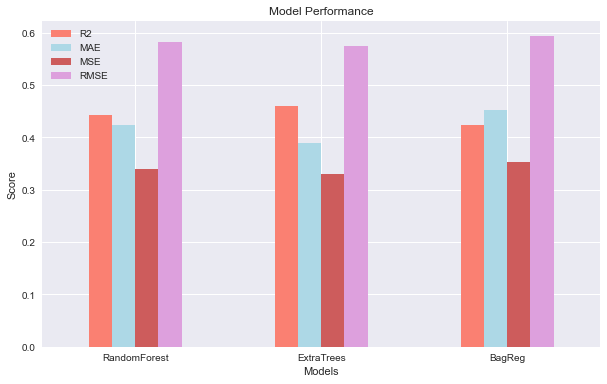

In [60]:
plt.style.use("seaborn")

models.plot(kind='bar', color=["salmon", 'lightblue', 'indianred', 'plum'], xlabel="Models", figsize=(10,6))
plt.ylabel("Score")
plt.title("Model Performance")
plt.xticks(rotation=0)
plt.fontsize = 15;

# Visualize the results

### **Random Forest Regression**

In [61]:
y_preds = rf_search.predict(X_test_stan)

comparison = {'Actual':y_test,'Predictions': y_preds}

rf_comparison = pd.DataFrame(comparison)
rf_comparison['Predictions'] = round(rf_comparison['Predictions'], 2)

rf_comparison.head()

,Actual,Predictions
0,6.0,5.49
1,5.0,4.78
2,7.0,6.94
3,6.0,5.03
4,5.0,5.23


Text(0.5, 1.0, 'Random Forest Regression')

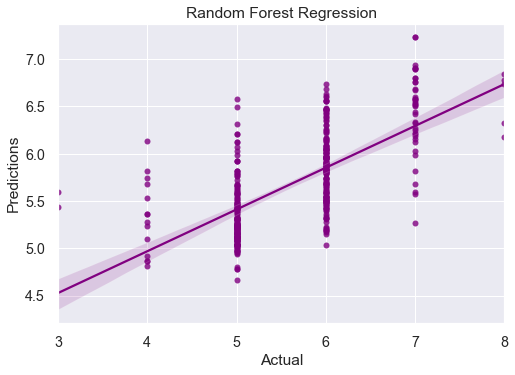

In [65]:
sns.set(font_scale=1.3)
sns.regplot(x="Actual", y="Predictions", data=rf_comparison, color="purple")
plt.title("Random Forest Regression")

### Extra Trees Regression

In [66]:
y_preds = extra_search.predict(X_test_stan)

comparison = {'Actual':y_test,'Predictions': y_preds}

extra_comparison = pd.DataFrame(comparison)
extra_comparison['Predictions'] = round(extra_comparison['Predictions'], 2)

extra_comparison.head()

,Actual,Predictions
0,6.0,5.49
1,5.0,4.77
2,7.0,7.00
3,6.0,5.08
4,5.0,5.00


Text(0.5, 1.0, 'Random Forest Regression')

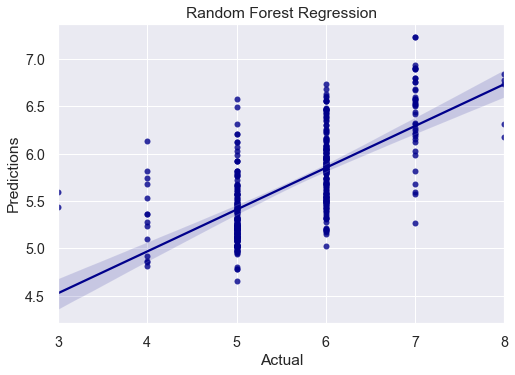

In [68]:
sns.set(font_scale=1.3)
sns.regplot(x="Actual", y="Predictions", data=rf_comparison, color="darkblue")
plt.title("Extra Trees Regression")